In [36]:
import sys
import os
current_dir = os.getcwd()
sys.path.append(current_dir)
import scatterm as scatterm_mod
import helper_utils as own_utils
import mplt as mplot
import auto_annotator as auto_annotator
ofolder = current_dir

In [37]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
import cytograph as cg
import cytograph.visualization as cgplot
import shoji


new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.size"] = 7
transparency = True
ms=0.7
labelspacing=0.3
viridis_grey  = (239/256, 239/256, 240/256,1)
lightgrey = matplotlib.cm.colors.to_rgba('lightgrey')


In [5]:
db = shoji.connect()

In [6]:
ws = db.builds.sten.humandev20220523.MidbrainNeuronal
xy = ws.Embedding[:]
labels = ws.Clusters[:]
age = ws.Age[:]
regions = ws.Region[:]
subregions = ws.Subregion[:]


In [7]:
clu_colour = {'0': [0.9375, 0.63671875, 0.99609375],
 '1': [0.0, 0.45703125, 0.859375],
 '10': [0.59765625, 0.24609375, 0.0],
 '11': [0.296875, 0.0, 0.359375],
 '12': [0.0, 0.359375, 0.19140625],
 '13': [0.16796875, 0.8046875, 0.28125],
 '14': [0.99609375, 0.796875, 0.59765625],
 '15': [0.5, 0.5, 0.5],
 '16': [0.578125, 0.99609375, 0.70703125],
 '17': [0.55859375, 0.484375, 0.0],
 '18': [0.61328125, 0.796875, 0.0],
 '19': [0.7578125, 0.0, 0.53125],
 '2': [0.0, 0.19921875, 0.5],
 '20': [0.99609375, 0.640625, 0.01953125],
 '21': [0.99609375, 0.65625, 0.73046875],
 '22': [0.2578125, 0.3984375, 0.0],
 '23': [0.99609375, 0.0, 0.0625],
 '24': [0.3671875, 0.94140625, 0.9453125],
 '25': [0.0, 0.59765625, 0.55859375],
 '26': [0.875, 0.99609375, 0.3984375],
 '27': [0.453125, 0.0390625, 0.99609375],
 '28': [0.59765625, 0.0, 0.0],
 '29': [0.99609375, 0.99609375, 0.5],
 '3': [0.99609375, 0.99609375, 0.0],
 '30': [0.99609375, 0.3125, 0.01953125],
 '31': [0.96875, 0.818359375, 0.998046875],
 '32': [0.5, 0.728515625, 0.9296875],
 '33': [0.798828125, 0.623046875, 0.5],
 '34': [0.6484375, 0.5, 0.6796875],
 '35': [0.5, 0.6796875, 0.595703125],
 '36': [0.583984375, 0.90234375, 0.640625],
 '37': [0.998046875, 0.8984375, 0.798828125],
 '38': [0.75, 0.75, 0.75],
 '39': [0.7890625, 0.998046875, 0.853515625],
 '4': [0.779296875, 0.7421875, 0.5],
 '40': [0.806640625, 0.8984375, 0.5],
 '41': [0.87890625, 0.5, 0.765625],
 '42': [0.5, 0.599609375, 0.75],
 '43': [0.998046875, 0.8203125, 0.509765625],
 '44': [0.998046875, 0.828125, 0.865234375],
 '45': [0.62890625, 0.69921875, 0.5],
 '46': [0.998046875, 0.5, 0.53125],
 '47': [0.68359375, 0.970703125, 0.97265625],
 '5': [0.5, 0.798828125, 0.779296875],
 '6': [0.9375, 0.998046875, 0.69921875],
 '7': [0.7265625, 0.51953125, 0.998046875],
 '8': [0.798828125, 0.5, 0.5],
 '9': [0.998046875, 0.998046875, 0.75]}


In [8]:
def is_in_set(a, b):
    set_b = set(b)
    return np.array([x in set_b for x in a])


In [13]:
path =os.path.join(ofolder,'annotation/region_annotation/')

annotator = auto_annotator.AutoAnnotator(root=path,connect='ws', ds=None,shoji=None,ws =ws)
mbn_anno_region = annotator.fit(connect='ws',ds=None,shoji=None,ws=ws)

path =os.path.join(ofolder,'annotation/midbrain_annotation/')

annotator = auto_annotator.AutoAnnotator(root=path,connect='ws', ds=None,shoji=None,ws =ws)
mbn_anno = annotator.fit(connect='ws',ds=None,shoji=None,ws=ws)


In [17]:
attr_region = dict(zip(np.arange(len(mbn_anno_region)),mbn_anno_region))
attr_mb = dict(zip(np.arange(len(mbn_anno)),mbn_anno))

## tidy up ####

attr_region_ = dict()
for k,v in attr_region.items():
    v_ = v.split(' ')
    v_ = ' '.join(np.unique(v_))
    attr_region_[k] = v_
    
attr_mb_ = dict()
for k,v in attr_mb.items():
    v_ = v.split(' ')
    v_ = ' '.join(np.unique(v_))
    attr_mb_[k] = v_
    
## combine both ####

attr_ = dict()
for k,v in attr_mb_.items():
    
    val = []
    
    #general autoannotation 
    ix = np.argmax(ws.AnnotationPosterior[:][k])
    val.append(ws.AnnotationName[:][ix])
    
    if attr_region_[k]=='':
        val.append('MB')
    else:
        val.append(attr_region_[k])

    val.append(v)

    val = ' '.join(val)
    val = val.rstrip().lstrip()
    attr_[k] = val
    
## combine region and general ####

attr_ = dict()
for k,v in attr_region_.items():
    
    val = []
    
    #general autoannotation 
    ix = np.argmax(ws.AnnotationPosterior[:][k])
    val.append(ws.AnnotationName[:][ix])
    
    if v=='':
        val.append('MB')
    else:
        val.append(v)

    val = ' '.join(val)
    val = val.rstrip().lstrip()
    attr_[k] = val
    
##### general annotation###
attr_general = dict()
for k,v in attr_region_.items():
        
    ix = np.argmax(ws.AnnotationPosterior[:][k])
    val = ws.AnnotationName[:][ix]
 
    attr_general[k] = val


In [19]:
clean_mb = {'':'',
    'RP':'RP', 
          'AlarMB':'AP',
          'AlarMB AlarMB-MHB':'AP-MHB',
          'AlarMB AlarMB-MHB dMbGlut':'AP-MHB',
          'AlarMB GABANbl':'AP',
          'AlarMB NbIntTG1':'AP',
          'AlarMB dMbGaba':'AP',
          'dMbGlut':'AP',
          'IC-CIC NbTG3a':'AP',
          'MHBw mbBP/AL':'MHB BP/AL',
          'mbBP/AL':'BP/AL',
       'mbBP/AL vbMB':'BP/AL',
          'AlarMB GABANbl SNR':'AP SNR',
          'SNR':'SNR',
          'SNRp':'SNRp',
          '+TH MHBr m6-BP-omtn mbBP/AL':'MHB BP/AL',
          '+FOXA2|+FOXA1 +TH DA mbFP': 'FP +FOXA2|FOXA1 +TH',
       '+FOXA2|+FOXA1 BP-m6 mbBP mbBP/AL mbFP': 'BP/AL FP +FOXA2|FOXA1 +TH',
          '+FOXA2|+FOXA1 mbFP mbFPL':'FP +FOXA2|+FOXA1',
       '+FOXA2|+FOXA1 mbBP mbBP/AL': 'BP/AL +FOXA2|+FOXA1',
          '+DDC Sert':'+DDC',
          '+TH':'+TH'}

In [20]:
mb_tidy = {'':'',
    'RP':'RP', 
          'AlarMB':'AP',
          'AlarMB AlarMB-MHB':'AP-MHB',
          'AlarMB AlarMB-MHB dMbGlut':'AP-MHB dMbGlut',
          'AlarMB GABANbl':'AP GABANbl',
          'AlarMB NbIntTG1':'AP NbIntTG1',
          'AlarMB dMbGaba':'AP dMbGaba',
          'dMbGlut':'dMbGlut',
          'IC-CIC NbTG3a':'IC-CIC NbTG3a',
          'MHBw mbBP/AL':'MHBw BP/AL',
          'mbBP/AL':'BP/AL',
       'mbBP/AL vbMB':'BP/AL vbMB',
          'AlarMB GABANbl SNR':'AP SNR GABANbl',
          'SNR':'SNR',
          'SNRp':'SNRp',
          '+TH MHBr m6-BP-omtn mbBP/AL':'MHBr BP/AL OMTN +TH',
          '+FOXA2|+FOXA1 +TH DA mbFP': 'FP +FOXA2|FOXA1 DA +TH',
       '+FOXA2|+FOXA1 BP-m6 mbBP mbBP/AL mbFP': 'BP/AL BP-m6 FP +FOXA2|FOXA1 +TH',
          '+FOXA2|+FOXA1 mbFP mbFPL':'FP FPL +FOXA2|+FOXA1',
       '+FOXA2|+FOXA1 mbBP mbBP/AL': 'BP/AL BP +FOXA2|+FOXA1',
          '+DDC Sert':'+DDC Sert',
          '+TH':'+TH'}

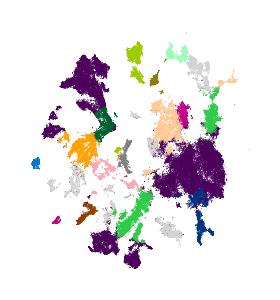

In [624]:
attr = np.array([attr_mb[i] for i in labels])
attr = np.array([clean_mb[i] for i in attr])

tmp,col_legend = mplot.factors(attr,xy,figsize=(1.5,1.3),s=0.1,\
                annotated=False,return_col=True,with_legend=False)
name = 'anno_mb_clean'
fname = ofolder+f'{name}.svg'
tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)
tmp

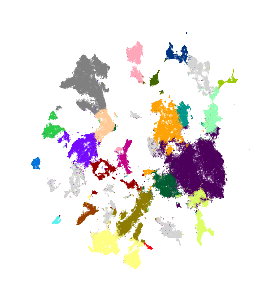

In [22]:
attr = np.array([attr_mb[i] for i in labels])
attr = np.array([mb_tidy[i] for i in attr])

tmp,col_legend = mplot.factors(attr,xy,figsize=(1.5,1.3),s=0.1,\
                annotated=False,return_col=True,with_legend=False)
name = 'anno_mb_tidy'
fname = ofolder+f'{name}.svg'
# tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)
tmp

In [625]:
# for summary one - clean #

tmp = ['RP', 'AP', 'AP SNR', 'AP-MHB','MHB BP/AL','SNR', 'SNRp',
'BP/AL',  'BP/AL +FOXA2|+FOXA1', 'BP/AL FP +FOXA2|FOXA1 +TH', \
'FP +FOXA2|+FOXA1', 'FP +FOXA2|FOXA1 +TH','+DDC', '+TH']

col_legend_ = dict()
for i, v in enumerate(tmp):
    col_legend_[v] = col_legend[v]


In [620]:
# for tidy one#

tmp = ['RP','AP', 'AP GABANbl', 'AP NbIntTG1', 'AP SNR GABANbl',
       'AP dMbGaba','IC-CIC NbTG3a',  'AP-MHB dMbGlut','dMbGlut','AP-MHB','SNR', 'SNRp',
     'BP/AL', 'BP/AL vbMB','MHBw BP/AL', 'MHBr BP/AL OMTN +TH','BP/AL BP +FOXA2|+FOXA1', 'BP/AL BP-m6 FP +FOXA2|FOXA1 +TH',
      'FP +FOXA2|FOXA1 DA +TH', 'FP FPL +FOXA2|+FOXA1' ,'+DDC Sert', '+TH']


col_legend_ = dict()
for i, v in enumerate(tmp):
    col_legend_[v] = col_legend[v]


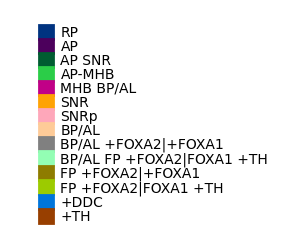

In [626]:


ax_size = [0.91,0,0.01,0.01]
scatterm_mod.draw_legend(list(col_legend_.values()),list(col_legend_.keys()),\
                         ax_size=ax_size,ms=0.8,labelspacing=0,fontsize=5,marker='s')


fname = ofolder+f'{name}_legend.svg'
plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


In [28]:
hb_anno = ['HindSert','HB','SensoryNeuron']
dien_anno = ['cTH','RP-DMR']
fb_anno = ['FOXG1+']
attr_region_tidy = dict()
for k,v in attr_region_.items():
    v_ = v.split(' ')
    if np.any(np.isin(v_,hb_anno)):
        attr_region_tidy[k] = 'Hindbrain'
    elif np.any(np.isin(v_,dien_anno)):
        attr_region_tidy[k] = 'Diencephalon'
    elif np.any(np.isin(v_,fb_anno)):
        attr_region_tidy[k] = 'Forebrain'
    else:
        attr_region_tidy[k] = 'Midbrain'

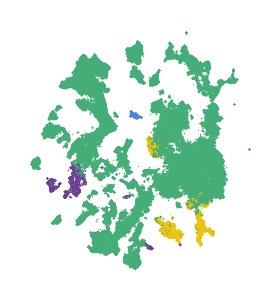

In [844]:
col_region = cgplot.Colorizer("regions")
col_region.scheme.dict()

attr = np.array([attr_region_tidy[i] for i in labels])

tmp = mplot.factors(attr,xy,figsize=(1.5,1.3),s=1,\
                annotated=False,cmap = col_region.scheme.dict(),with_legend=False)
# name = 'anno_regions'
# fname = ofolder+f'{name}.svg'
# tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)
tmp

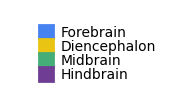

In [855]:
figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  

ax_size = [0.91,0,0.01,0.01]
final_cmap = ['Forebrain','Diencephalon','Midbrain','Hindbrain']
final_cmap_ =[]
for c in final_cmap:
    final_cmap_.append(col_region.scheme.dict()[c])
scatterm_mod.draw_legend(final_cmap_,final_cmap,ax_size,ms=0.8,labelspacing=0,fontsize=5,marker='s')

name = 'anno_regions'
fname = ofolder+f'{name}_legend.svg'
plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


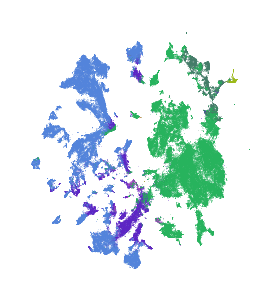

In [1111]:
ws_clean = db.builds.sten.humandev20220523.PoolClean

b00l = is_in_set(ws_clean.CellID[:],ws.CellID[:])
ix = own_utils.ixs_thatsort_a2b(ws_clean.CellID[b00l][:],ws.CellID[:])
attr = ws_clean.Clusters[b00l][ix]
class_dict = dict(zip(ws_clean.ClusterID[:],ws_clean.Class))

attr = np.array([class_dict[a] for a in attr])
col_region = cgplot.Colorizer("classes")
col_region.scheme.dict()


tmp = mplot.factors(np.ravel(attr),xy,figsize=(1.5,1.3),s=0.1,\
                annotated=False,cmap = col_region.scheme.dict(),with_legend=False)
# name = 'anno_classes'
# fname = ofolder+f'{name}.svg'
# tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)
tmp

In [1122]:
class_dict = dict(zip(ws_clean.CellID[b00l][:][ix],np.ravel(attr)))

In [1124]:
import numpy as np
np.save(f'{ofolder}/class_dict.npy', class_dict) 


In [1126]:
col_region = cgplot.Colorizer("classes")
col_region.scheme.dict()

{'Neuron': '#5384db',
 'Neuroblast': '#5d25c4',
 'Neuronal IPC': '#ab3bc4',
 'Radial glia': '#27b35d',
 'Glioblast': '#447c69',
 'Oligo': '#9cba19',
 'Fibroblast': '#c48351',
 'Neural crest': '#eec79f',
 'Placodes': '#70510e',
 'Immune': '#e7c31f',
 'Vascular': '#e12e12',
 'Erythrocyte': '#ff617f',
 'Failed': '#9f9f9f'}

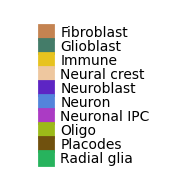

In [869]:
figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  

ax_size = [0.91,0,0.01,0.01]

final_cmap =[]
for a in np.unique(np.ravel(attr)):
    final_cmap.append(col_region.scheme.dict()[a])
scatterm_mod.draw_legend(final_cmap,np.unique(np.ravel(attr)),ax_size,ms=0.8,labelspacing=0,fontsize=5,marker='s')
name
fname = ofolder+f'{name}_legend.svg'
plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


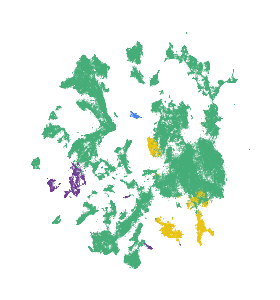

In [871]:
col_region = cgplot.Colorizer("regions")
col_region.scheme.dict()

attr = np.array([attr_region_tidy[i] for i in labels])

tmp = mplot.factors(attr,xy,figsize=(1.5,1.3),s=0.1,\
                annotated=False,cmap = col_region.scheme.dict(),with_legend=False)
name = 'anno_regions'
fname = ofolder+f'{name}.svg'
tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)
tmp

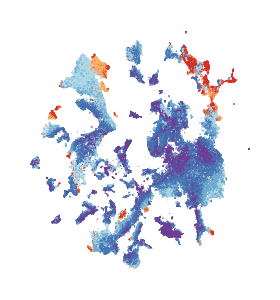

In [1000]:
age_cmap = cgplot.Colorizer("age").cmap
age = ws.Age[:]
cmap = scatterm_mod.scattern(figsize=(1.5,1.3),xy = xy, c=age, cmap=age_cmap, vmin=5, vmax=14, s=0.1,rasterized=True)

name = 'anno_age'
fname = ofolder+f'{name}.svg'
plt.axis('off')
plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)


In [1029]:
importlib.reload(scatterm_mod)

<module 'scatterm' from '/data/proj/EA_KWL/rmd/from_git/plotting/scatterm.py'>

In [1030]:
age_colour = [[0.43529411, 0.23921568, 0.58039215, 1.],
[0.26905037, 0.45397924, 0.70349865, 1.],
[0.45490196, 0.67843137, 0.81960784, 1.],
[0.66635909, 0.84759708, 0.91188005, 1.],
[0.87843137, 0.95294118, 0.97254902, 1.],
[0.99607843, 0.87843137, 0.56470588, 1.],
[0.99146482, 0.67735486, 0.37808535, 1.],
[0.95686275, 0.42745098, 0.26274510, 1.],
[0.83929258, 0.18454441, 0.15286428, 1.]]

age_colour = matplotlib.colors.ListedColormap(age_colour)
ax_size =[0.91,0,0.009,0.12]

from matplotlib.colors import Normalize


# fig = plt.figure(None,(1.5,1.3))


normalize = Normalize(vmin = 5, vmax = 14)
colorbar = dict({'sm':ScalarMappable(norm=normalize,cmap=age_color),
                            'vmin':5,
                            'vmax':14})

tmp = scatterm_mod.draw_colorbar(colorbar,ax_size,cticks=np.arange(5,15))
fname = ofolder+f'{name}_legend.svg'
plt.show()
tmp.savefig(fname, format="svg", dpi=144, bbox_inches='tight')




## neighbour of TH+/ FOXA2+ FOXA1+

In [158]:
def NN(ws,cluster,step:int=1):
    xy = ws.Embedding[:]
    edges =ws.ManifoldIndices[:]
    
    b00l = ws.Clusters[:]==cluster
    
    cellno = np.arange(xy.shape[0])
    cell_edge = np.isin(edges[:,0], cellno[b00l])  # locate edges coming from the particular cluster

    next_neighbours_list = []
    neighbours = edges[:,1][cell_edge] # the neighbours of those clusters 

    if step>1:
        next_neighbours_list.append(neighbours)
        step_i =1
        while step_i <step:
            neighbours_ = np.copy(neighbours)
            cell_edge_ =  np.isin(edges[:,0],neighbours_)
#             next_neighbours = np.concatenate([next_neighbours,neighbours])
#             next_neighbours = np.array(next_neighbours).flatten().astype('int')
#             neighbours = edges[:,1][next_neighbours]
            neighbours = edges[:,1][cell_edge_]
            next_neighbours_list.append(neighbours)
            step_i+=1
            
        neighbours = np.array([i for s in next_neighbours_list for i in s])
            
    return neighbours.tolist()

In [ ]:
def NN(ws,cluster,step:int=1):
    
    
    xy = ws.Embedding[:]
    edges = ws.ManifoldIndices[:]
    
    b00l = ws.Clusters[:]==cluster
    
    cellno = np.arange(xy.shape[0])
    cell_edge = np.isin(edges[:,0], cellno[b00l])

    next_neighbours = []
    neighbours = edges[:,1][cell_edge]

    if step>1:
        step_i =0
        while step_i <step:
            next_neighbours = np.concatenate([next_neighbours,neighbours])
            next_neighbours = np.array(next_neighbours).flatten().astype('int')
            neighbours = edges[:,1][next_neighbours]
            
            step_i+=1
            
        neighbours = next_neighbours
    
    return neighbours.tolist()

In [176]:
import re
search = re.compile('\+TH|\+FOXA')
clu_to_take = []
for k,v in attr_.items():
    if search.search(v)!=None:
        clu_to_take.append(k)

In [177]:
clu_to_take

[0, 9, 10, 11, 26, 31]

In [178]:
agg_neighbours = []
for i in [0,9,10,11,26,31]:
    neighbours = NN(ws,i,1)
    agg_neighbours.append(neighbours)
    
agg_neighbours = [i for s in agg_neighbours for i in s]
agg_neighbours = np.sort(np.unique(np.array(agg_neighbours)))

In [225]:
anno = [attr_region[i] for i in labels]
agg_neighbours_clean_ = np.intersect1d(np.unique(agg_neighbours),np.where(np.array(anno)=='')[0])

#save agg_neighbours_clean = np.loadtxt('/data/proj/EA_KWL/rmd/emeliedata/out/mb/mbn/agg_neighbours_clean.out').astype(np.int32)


In [230]:
b00l = is_in_set(ws.Clusters[:],np.array([0,9,10,11,26,31]))
agg_neighbours_clean = np.loadtxt('/data/proj/EA_KWL/rmd/emeliedata/out/mb/mbn/agg_neighbours_clean.out').astype(np.int32)
iloc = np.unique(np.concatenate([np.squeeze(b00l).nonzero()[0],agg_neighbours_clean]))
cond = np.isin(np.arange(ws.cells.shape),iloc).astype('int')

In [592]:
ws_subset = db.builds.sten.humandev20220523.MidbrainTHneighbours_split_clean_sex
sclusters = ws_subset.Clusters[:]
sub_xy = ws_subset.Embedding[:]
scellid = ws_subset.CellID[:]

In [628]:
split_clu =dict(zip(scellid,sclusters))
attr =[]
for i in ws.CellID[:]:
    if i in split_clu.keys():
        attr.append(split_clu[i])
    else:
        attr.append('')
attr = np.array([str(i) for i in attr])

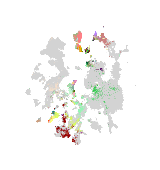

In [633]:
clu_colour[''] = lightgrey
tmp = mplot.factors(attr = attr,embed = xy,figsize=(0.75,0.65),s=0.1,#(1.5,1.3),s=0.5,\
                 cmap= clu_colour,\
                    annotated=False,with_legend=False)
name = 'subcluster_in_maintsne_small'
fname = ofolder+f'{name}.svg'
tmp.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)
tmp

In [608]:
import importlib
importlib.reload(mplot)

<module 'mplt' from '/data/proj/EA_KWL/rmd/from_git/plotting/mplt.py'>

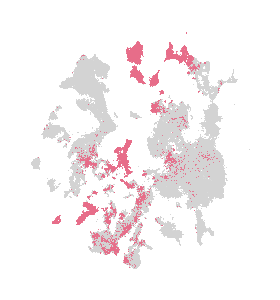

In [611]:
attr = np.isin(attr,[''],invert=True)
tmp = mplot.factors(attr = attr,embed = xy,figsize=(1.5,1.3),s=0.5,\
                 
                    annotated=False,with_legend=False)
name = 'subcluster_in_maintsne_binary'
fname = ofolder+f'{name}.svg'
tmp.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)
tmp

### subset

In [651]:
ws_subset = db.builds.sten.humandev20220523.MidbrainTHneighbours_split_clean_sex
clusters = ws_subset.Clusters[:]
xy = ws_subset.Embedding[:]
cellid = ws_subset.CellID[:]

In [636]:
clu_colour = {'0': [0.9375, 0.63671875, 0.99609375],
 '1': [0.0, 0.45703125, 0.859375],
 '10': [0.59765625, 0.24609375, 0.0],
 '11': [0.296875, 0.0, 0.359375],
 '12': [0.0, 0.359375, 0.19140625],
 '13': [0.16796875, 0.8046875, 0.28125],
 '14': [0.99609375, 0.796875, 0.59765625],
 '15': [0.5, 0.5, 0.5],
 '16': [0.578125, 0.99609375, 0.70703125],
 '17': [0.55859375, 0.484375, 0.0],
 '18': [0.61328125, 0.796875, 0.0],
 '19': [0.7578125, 0.0, 0.53125],
 '2': [0.0, 0.19921875, 0.5],
 '20': [0.99609375, 0.640625, 0.01953125],
 '21': [0.99609375, 0.65625, 0.73046875],
 '22': [0.2578125, 0.3984375, 0.0],
 '23': [0.99609375, 0.0, 0.0625],
 '24': [0.3671875, 0.94140625, 0.9453125],
 '25': [0.0, 0.59765625, 0.55859375],
 '26': [0.875, 0.99609375, 0.3984375],
 '27': [0.453125, 0.0390625, 0.99609375],
 '28': [0.59765625, 0.0, 0.0],
 '29': [0.99609375, 0.99609375, 0.5],
 '3': [0.99609375, 0.99609375, 0.0],
 '30': [0.99609375, 0.3125, 0.01953125],
 '31': [0.96875, 0.818359375, 0.998046875],
 '32': [0.5, 0.728515625, 0.9296875],
 '33': [0.798828125, 0.623046875, 0.5],
 '34': [0.6484375, 0.5, 0.6796875],
 '35': [0.5, 0.6796875, 0.595703125],
 '36': [0.583984375, 0.90234375, 0.640625],
 '37': [0.998046875, 0.8984375, 0.798828125],
 '38': [0.75, 0.75, 0.75],
 '39': [0.7890625, 0.998046875, 0.853515625],
 '4': [0.779296875, 0.7421875, 0.5],
 '40': [0.806640625, 0.8984375, 0.5],
 '41': [0.87890625, 0.5, 0.765625],
 '42': [0.5, 0.599609375, 0.75],
 '43': [0.998046875, 0.8203125, 0.509765625],
 '44': [0.998046875, 0.828125, 0.865234375],
 '45': [0.62890625, 0.69921875, 0.5],
 '46': [0.998046875, 0.5, 0.53125],
 '47': [0.68359375, 0.970703125, 0.97265625],
 '5': [0.5, 0.798828125, 0.779296875],
 '6': [0.9375, 0.998046875, 0.69921875],
 '7': [0.7265625, 0.51953125, 0.998046875],
 '8': [0.798828125, 0.5, 0.5],
 '9': [0.998046875, 0.998046875, 0.75]}

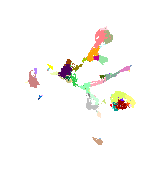

In [640]:
attr = np.array([str(i) for i in clusters])
tmp= mplot.factors(attr,xy,figsize=(1.5/2,1.3/2),s=0.5,\
                annotated=False,with_legend=False,cmap = clu_colour)

fname = ofolder+f'/subset_clusters.svg'

tmp.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)


tmp

In [1138]:
attr = [class_dict[i] for i in ws_subset.CellID[:]]
tmp= mplot.factors(attr,xy,figsize=(1.5,1.3),s=0.5,\
                annotated=False,with_legend=False,cmap = cgplot.Colorizer("classes").scheme.dict())

fname = ofolder+f'/subset_classes.svg'

tmp.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)


tmp

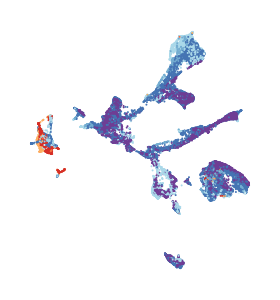

In [507]:
age_cmap = cgplot.Colorizer("age").cmap
age = ws_subset.Age[:]
cmap = scatterm_mod.scattern(figsize=(1.5,1.3),xy = xy, c=age, cmap=age_cmap, vmin=5, vmax=14, s=0.5,rasterized=True)

name = 'subset_anno_age'
fname = ofolder+f'{name}.svg'
plt.axis('off')
plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)


In [1041]:

base_c = np.log2(ws_subset.Expression[:, ws_subset.Gene == 'FOXA2'].flatten() + 1)
base_c = (base_c >0).astype(int)
genes = ['LMX1A','NKX6-1','NKX6-2','NKX2-2']

c = [np.log2(ws_subset.Expression[:, ws_subset.Gene == g].flatten() + 1) for g in genes]

c= c*base_c

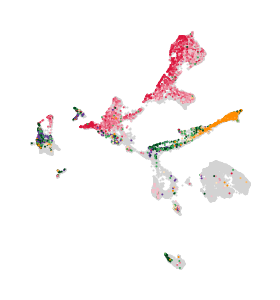

In [1042]:
cmaps=["crimson", "Greens",'darkorange','rebeccapurple']
final_cmaps = scatterm_mod.scatterm(
    xy,
    figsize=(1.5,1.3),s=0.5,
    c=c,
    cmaps=cmaps,
    bgval=0,
    labels=genes,
    legend=None,
    rasterized=True,
    max_percentile=99
)
plt.axis('off')

        

name = '_'.join(genes)
fname = ofolder+f'FOXA2_{name}.svg'
# plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)

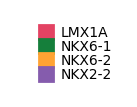

In [1045]:
figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  

ax_size = [0.91,0,0.01,0.01]
leg = ['LMX1A', 'NKX6-1', 'NKX6-2', 'NKX2-2']
scatterm_mod.draw_legend(final_cmaps,leg,\
                         ax_size=ax_size,fontsize=5,
                         ms=0.8,labelspacing=0,marker='s')


fname = ofolder+f'{name}_legend.svg'
plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


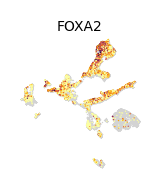

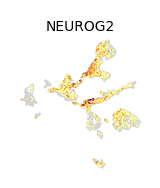

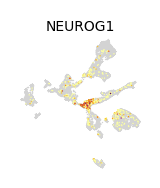

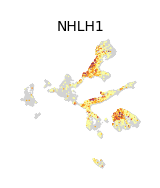

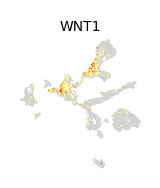

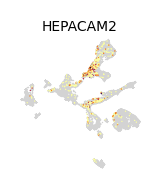

In [1039]:
# genes_list = ['NEUROG2','NEUROG1','FOXA2','NHLH1','WNT1','HEPACAM2']
ws_subset = db.builds.sten.humandev20220523.MidbrainTHneighbours_split_clean_sex
xy = ws_subset.Embedding[:]

genes_list = ['FOXA2','LMX1A','NEUROG2','NEUROG1','NHLH1','WNT1','HEPACAM2']

for g in genes_list:
    genes = g
    c=np.log2(ws_subset.Expression[:, ws_subset.Gene == g].flatten() + 1)
    sm = scatterm_mod.scattern(
        figsize=(0.75,0.65),#(1.5,1.3),
        xy = xy,
        c=c,
        bgval=0,
        rasterized=True,
        s=0.25, #0.5

    )
    plt.title(genes,fontsize=5,y=0.93)
    plt.margins(0.01, 0.01)
    plt.axis('off')

    name = '_'.join([genes])
    fname = ofolder+f'small/{name}.svg'
    plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)
    

In [1349]:
base_gene = ['LMX1A','FOXA2']
base_c =[np.log2(ws_subset.Expression[:, ws_subset.Gene == g].flatten() + 1) for g in base_gene]
base_c = np.prod(base_c,axis=0)
base_c = (base_c >0).astype(int)
genes = ['EN1','PITX2']

c = [np.log2(ws_subset.Expression[:, ws_subset.Gene == g].flatten() + 1) for g in genes]

c= c*base_c

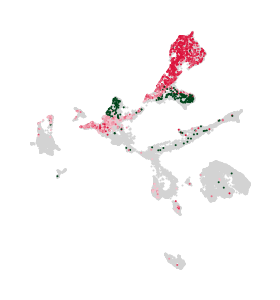

In [1350]:
cmaps=["crimson", "Greens"]
final_cmaps = scatterm_mod.scatterm(
    xy,
    figsize=(1.5,1.3),s=0.5,
    c=c,
    cmaps=cmaps,
    bgval=0,
    labels=genes,
    legend=None,
    rasterized=True,
    max_percentile=99
)
plt.axis('off')

        

name = '_'.join(genes)
# fname = ofolder+f'LMX1A_{name}.svg'
# plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)

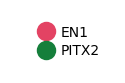

In [1351]:
figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  

ax_size = [0.91,0,0.01,0.01]
leg = ['EN1', 'PITX2']
scatterm_mod.draw_legend(final_cmaps,leg,\
                         ax_size=ax_size,fontsize=5,ms=1,labelspacing=0.3)
#                          ms=0.8,labelspacing=0,,marker='s')


fname = ofolder+f'LMX1A_{name}_legend.svg'
plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


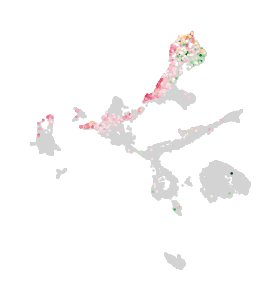

In [575]:
base_gene = ['FOXA2','LMX1A','EN1']
base_c =[np.log2(ws_subset.Expression[:, ws_subset.Gene == g].flatten() + 1) for g in base_gene]
base_c = np.prod(base_c,axis=0)
base_c = (base_c >0).astype(int)
genes = ['SOX6','CALB1']

c = [np.log2(ws_subset.Expression[:, ws_subset.Gene == g].flatten() + 1) for g in genes]

c= c*base_c

both_c = np.prod(c,axis=0)

both = np.sum(c>0,axis=0)==2

figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  
ax = fig.add_axes([0, 0, 0.8, 1])

cmaps=["crimson", "Greens"]
final_cmaps = scatterm_mod.scatterm(
    xy[np.invert(both),:],
    figsize=(1.5,1.3),s=0.9,
    c=c[:,np.invert(both)],
    ax = ax,fig=fig,
    cmaps=cmaps,
    bgval=0,
    labels=genes,
    legend=None,
    rasterized=True,
    max_percentile=100
)

cmaps=["darkorange"]
sm = scatterm_mod.scattern(
    figsize=(1.5,1.3),
    xy = xy[both,:],
    ax=ax,fig=fig,
    cmap= cmaps[0],
    c=both_c[both],
    bgval=0,
    rasterized=True,
    s=0.9,

)
plt.axis('off')
        

name = '_'.join(genes)
fname = ofolder+f'FOXA2_LMX1A_EN1_{name}_both.svg'
plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)

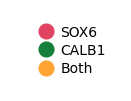

In [567]:
final_cmaps.append(sm)
figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  

ax_size = [0.91,0,0.01,0.01]
leg = ['SOX6', 'CALB1','Both']
scatterm_mod.draw_legend(final_cmaps,leg,\
                         ax_size=ax_size,fontsize=5,ms=0.8,labelspacing=0.3)
                         #ms=0.5,labelspacing=-0.3,fontsize=5,marker='s')


fname = ofolder+f'FOXA2_LMX1A_EN1_{name}_both_legend.svg'
plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


In [568]:
b00l = np.isin(ws_subset.Clusters[:],[44,45,46])

base_gene = ['FOXA2','LMX1A','EN1']
base_c =[np.log2(ws_subset.Expression[:, ws_subset.Gene == g].flatten() + 1) for g in base_gene]
base_c = np.prod(base_c,axis=0)
base_c = (base_c >0).astype(int)
genes = ['SOX6','CALB1']

c = [np.log2(ws_subset.Expression[:, ws_subset.Gene == g].flatten() + 1) for g in genes]

c= c*base_c

both_c = np.prod(c,axis=0)[b00l]
c = c[:,b00l]

both = np.sum(c>0,axis=0)==2


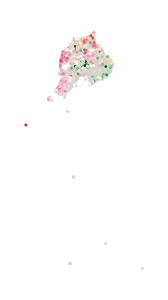

In [573]:
figsize =(0.8, 1.3)
fig = plt.figure(None,figsize)  
ax = fig.add_axes([0, 0, 0.8, 1])

cmaps=["crimson", "Greens"]
final_cmaps = scatterm_mod.scatterm(
    xy[b00l,:][np.invert(both),:],
    figsize=(1.5,1.3),s=1,
    c=c[:,np.invert(both)],
    ax = ax,fig=fig,
    cmaps=cmaps,
    bgval=0,
    labels=genes,
    legend=None,
    rasterized=True,
    max_percentile=100
)

cmaps=["darkorange"]
sm = scatterm_mod.scattern(
    figsize=(1.5,1.3),
    xy = xy[b00l,:][both,:],
    ax=ax,fig=fig,
    cmap= cmaps[0],
    c=both_c[both],
    bgval=0,
    rasterized=True,
    s=1,

)

plt.axis('off')


name = '_'.join(genes)
fname = ofolder+f'FOXA2_LMX1A_EN1_{name}_both_zoom.svg'
plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)

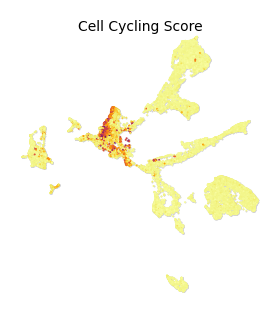

In [836]:
c=ws_subset.CellCycleFraction[:]
sm = scatterm_mod.scattern(
    figsize=(1.5,1.3),
    xy = xy,
    c=c,
    bgval=0,
    rasterized=True,
    s=0.5,

)
plt.title('Cell Cycling Score',fontsize=5,y=0.95)
plt.margins(0.01, 0.01)
plt.axis('off')

fname = ofolder+f'cellcycling.svg'
plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)
  

## compare to La manno et al., 2016

In [44]:
import os
import loompy
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import classification_report

lamanno = '/data/proj/EA_KWL/data/LaManno2016/EmbryoMoleculeCounts.loom'


In [6]:
with loompy.connect(lamanno,'r') as ds:

    SNAR_genes = ['SNAR-E', 'SNAR-A13_loc1', 'SNAR-C1_loc1', 'SNAR-A1_loc2', 'SNAR-A8_loc1', 'SNAR-C1_loc2', 'SNAR-A2_loc2', 'SNAR-C4', 
                  'SNAR-A12_loc1', 'SNAR-C3', 'SNAR-C1_loc3', 'SNAR-G2', 'SNAR-G1', 'SNAR-A11_loc9', 'SNAR-A6_loc3', 'SNAR-A14_loc7', 'SNAR-A6_loc5', 
                  'SNAR-A10_loc6', 'SNAR-A5_loc9', 'SNAR-A14_loc3', 'SNAR-A9_loc9', 'SNAR-A11_loc7', 'SNAR-B1_loc1', 'SNAR-B1_loc2', 'SNAR-D', 'SNAR-F']
    blood_genes = ['HBG1','HBA1','HBA2','HBE1','HBZ','BLVRB','S100A6']

    tomask=["sex", "ery",'cellcycle','ieg','mt']


    block = Species.detect(ds).mask\
                   (ds, tomask)

    filtered_sele_gene=[]
    search = re.compile('^RPS|^MRPS|^RPL|^MRPL') 
    ribo_gene =[]
    for i in ds.ra.Gene:
        if search.search(i) != None:
            ribo_gene.append(i)


    old_cellcyclename = ['STRA13'] #i.e.CENPX
    valid = ds.ra.Valid==1

    f_gene_bool = block & np.isin(ds.ra.Gene, ribo_gene) & np.isin(ds.ra.Gene,old_cellcyclename)


In [ ]:
with loompy.connect(lamanno) as ds:
    b00l = FeatureSelectionByVariance(n_genes = 2000,\
                               mask =f_gene_bool ).fit(ds)
    ds.ra.LR_selected_2000 = b00l

In [156]:
with loompy.connect(lamanno) as ds:
    
    b00l_ = np.isin(ds.ca.Cell_type, 'Unk')
    proto_i = [proto[i] for i in ds.ca.Cell_type]
    le.fit(np.unique(proto_i))
    labels = le.transform(proto_i).astype('int')
    labels_ =  le.transform(np.unique(proto_i)).astype('int')
    
    b00l = ds.ra.LR_selected_2000==1

    X = ds[b00l.nonzero()[0],:].T
    y = labels
    
    sss = StratifiedShuffleSplit(n_splits=1,random_state=0)
    train_index_ = []
    test_index_ = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print(y_train,y_test)
        train_index_.append(train_index)
        test_index_.append(test_index)
        
        
    RF_train_b00l = np.zeros(ds.shape[1])
    RF_train_b00l[train_index_[0]]=1
    RF_train_b00l[b00l_] = 0
    
    ds.ca.RF_train_b00l_proto_1 = RF_train_b00l

[13  4 11 ...  6  2  2] [11 17 13 19 11 19 16  0  9  0  1 13 12 19  4  3 12 10  0  7  0 13  4 16
 19 16 16 16 11  2 16 13  4 16 11 19 13 11 19 17  9 16 13  2 12 10 19 16
  3 13 18 11 16  5  4  8 12  6  2 11 19 16  5 16  7 11 16 14 12  2 16 19
 17 16  1 13  0  9 12  2 19 15  3 13 11  9 16 16  2  2 16 16  0 12  6 16
 11  7 11 12  7 16 16  4  0 11  9 11 13  4 19  9 19  1  3 16 13 12 12 13
  6  2  9 19 11  8 13  0  7 19  8 13 19  1  9  7 19 11 19  3 19 14  6  9
 11 11 13 16  6 16 13  7 13 16 16 15  6  6 15 19  7 13 12 19 11  1 19 12
 17 17 15 19 16  9  9 13  3  8 11 19 19 13  7 19 14 19  6 19 16 16  6 16
  4 19 10  8 14  6]


In [54]:

run = 'VMMOD10'

f1 = pd.read_csv(os.path.join(ofolder,f'LR_params/{run}_metrics_train_mean_f1.csv'),header=None)
acc = pd.read_csv(os.path.join(ofolder,f'LR_params/{run}_metrics_train_mean_accuracy.csv'),header=None)
trial= pd.read_csv(os.path.join(ofolder,f'LR_params/{run}_trials_params.csv'),header=None)

acc = acc[2]
f1 = f1[2]

C = trial[2].values
C = np.array([float(i.split(': ')[1].strip('}')) for i in C])

C = np.array([np.log(i) for i in C])

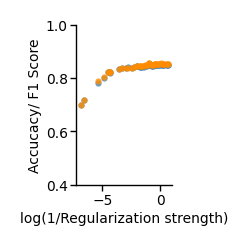

In [1105]:
fig = plt.figure(None,(1.2,0.8))

ax1 = fig.add_axes([0,0,0.4,1])

dot_size = 5
# ax1 = fig.add_subplot(121)
ax1.scatter(C,f1.values,alpha=0.8,c='steelblue',s=dot_size,lw=0,rasterized=True)
ax1.scatter(C,acc.values,alpha=0.8,c='darkorange',s=dot_size,lw=0,rasterized=True)
# ax1.set_xlim(-0.2,2.5)
ax1.set_ylim(0.4,1)
# ax1.set_yticks([0.,1])

ax1.tick_params(axis='y', which='major', pad=1)
ax1.tick_params(axis='x', which='major', pad=1)


ax1.set_ylabel('Accucacy/ F1 Score',labelpad=1.5,fontsize=5)
ax1.set_xlabel('log(1/Regularization strength)',labelpad=1.5,fontsize=5)

ax1.tick_params(axis='both', labelsize=5,length=2,width=0.5)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.tick_params(axis='x', which='major', pad=0.9)

    
plt.subplots_adjust(wspace=0.1)

# fname = ofolder +'Acc_f1.svg'
# plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)


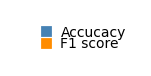

In [1107]:
figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  

ax_size = [0.91,0,0.01,0.01]
leg = ['Accucacy', 'F1 score']
scatterm_mod.draw_legend(['steelblue','darkorange'],leg,\
                         ax_size=ax_size,ms=0.5,labelspacing=-0.2,fontsize=5,marker='s')


fname = ofolder+f'Acc_f1_legend.svg'
plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


In [43]:
with loompy.connect(lamanno,'r') as ds:
    b00l = ds.ra.LR_selected_2000==1
    
    X = (ds[b00l.nonzero()[0],:][:,ds.ca.RF_train_b00l_proto_1==1]).T
    labels = ds.ca.lelabels_proto_1
    y = labels[ds.ca.RF_train_b00l_proto_1==1]
    
    b00l_1 = np.logical_and(ds.ca.RF_train_b00l_proto_1==0, labels!=19)
    
    X_test = (ds[b00l.nonzero()[0],:][:,b00l_1]).T
    
    train_norm_log, df_test_log, normalizer = df_compare(X.T,X_test.T)
    X_train_norm = (own_utils.div0(train_norm_log,normalizer)).T
    X_test_norm = (own_utils.div0(df_test_log,normalizer)).T
#     X_test = Binarizer(threshold=3).fit_transform(X_test)
    
    y_test = labels[b00l_1]
    
    LR_train_best_2000_proto_1 = LogisticRegression(C =0.3687522148091768,
                                    class_weight='balanced',
                                    solver='newton-cg',
                                    fit_intercept=False, 
                                    multi_class='multinomial',
                                       penalty='l2',
                                       random_state=0)
    
    LR_train_best_2000_proto_1.fit(X_train_norm,y)
    
    y_pred = LR_train_best_2000_proto_1.predict(X_test_norm)
    
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))


0.825411479747666

In [52]:
labels_dict = dict({'DA': 0,
                    'DA0': 1,
                    'Endo': 2,
                    'Gaba': 3,
                    'GabaNb': 4,
                    'Mgl': 5,
                    'NProg': 6,
                    'NbM': 7,
                    'NbML1': 8,
                    'OMTN': 9,
                    'OPC': 10,
                    'Peric': 11,
                    'ProgBP': 12,
                    'ProgFP': 13,
                    'RN': 14,
                    'Rgl1': 15,
                    'Rgl2': 16,
                    'Rgl3': 17,
                    'Sert': 18})
inv_labels = {v: k for k, v in labels_dict.items()}

color_lamanno_proto1 = dict(zip(labels_dict.keys(),\
                                mplot.colorize(np.arange(len(labels_dict.keys())))))

In [53]:

classification_report_dict = (classification_report(y_test, y_pred,\
                                                    target_names=list(labels_dict.keys()),output_dict=True)) #DA ctrl


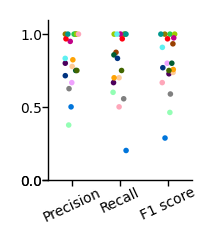

In [770]:
import seaborn as sns
precision =[]
recall =[]
f1=[]
Cell_type =[]
class_k =[]
for k,v in classification_report_dict.items():
#     print(v['precision'])
    if k in ['accuracy','macro avg','weighted avg']:
        continue
    else:
        class_k.append(k)
        Cell_type.append(k)
        precision.append(v['precision'])
        recall.append(v['recall'])
        f1.append(v['f1-score'])


class_melt = pd.DataFrame({'Precision':precision,
              'Recall': recall,
              'F1 score': f1,
                'Cell type':Cell_type})
class_melt = pd.melt(class_melt,id_vars='Cell type')

fig = plt.figure(None,(0.8,0.8))
# fig = plt.figure(None,(5,5))
ax1 = fig.add_axes([0,0,0.9,1])
ax1.set_ylim([0.1,1.1])
ax1.set_yticks([0,0.5,1,0])

dotsize=2

class_strip = sns.stripplot(x='variable',y='value',data=class_melt,jitter=0.15,hue='Cell type',\
                            palette =color_lamanno_proto1,ax=ax1,size=dotsize,rasterized=True)
class_strip.get_legend().remove()
ax1.set_xticklabels(['Precision','Recall','F1 score'],rotation=25)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='both', labelsize=5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.tick_params(axis='both', labelsize=5,length=2,width=0.5)

ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', pad=0.01)

name = 'VMMOD10_classreport'
fname = ofolder+f'{name}.svg'

plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)
# name = 'classification_report'
# fname = ofolder+f'fig/FIG/v2/rasterized/{name}.svg'
# plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)

In [41]:


def df_compare(trainset,testset):
    
    relative_size_ref = np.sum(trainset,axis=0)
    target_size = np.median(relative_size_ref)

    norm_factor = own_utils.div0(target_size,relative_size_ref)
    train_norm  = trainset*norm_factor
    train_norm_log = np.log(train_norm + 1)

    relative_size = np.sum(testset,axis=0)

    norm_factor = own_utils.div0(target_size,relative_size)
    df_test  = testset*norm_factor

    df_test_log = np.log(df_test + 1)
    
    normalizer=0.9*train_norm_log.max(1)[:, None]
    
    return train_norm_log, df_test_log, normalizer

In [555]:

with loompy.connect(lamanno,'r') as ds:
    
        b00l = ds.ra.LR_selected_2000==1
        hvg = ds.ra.Gene[b00l]
        b = ws_subset.Gene[:]
        a = hvg
        tmp,one_iloc_a,one_iloc_b = own_utils.inter_gene(a,b)
        
        test_mtx = np.zeros((len(hvg),ws_subset.Expression.shape[0]))
        tmp = ws_subset.Expression[:,np.sort(one_iloc_b)].T
        test_mtx[one_iloc_a[np.argsort(one_iloc_b)],:] =  tmp
        test_mtx = (test_mtx.T)
    
        b00l_1 = ds.ca.lelabels_proto_1!=19
        
        X = (ds[b00l.nonzero()[0],:][:,b00l_1]).T
        train_norm_log, df_test_log, normalizer = df_compare(X.T,test_mtx.T)
        X_train_norm = (own_utils.div0(train_norm_log,normalizer)).T
        X_test_norm = (own_utils.div0(df_test_log,normalizer)).T

        labels = ds.ca.lelabels_proto_1[b00l_1]
        y = labels

LR_train_full_proto = LogisticRegression(C = 0.21271826184029502,
                            class_weight='balanced',
                            solver='newton-cg',
                            fit_intercept=False, 
                            multi_class='multinomial',
                               penalty='l2',
                               random_state=0)
LR_train_full_proto.fit(X_train_norm,y)
predicted = LR_train_full_proto.predict(X_test_norm)
predicted_proba = LR_train_full_proto.predict_proba(X_test_norm)

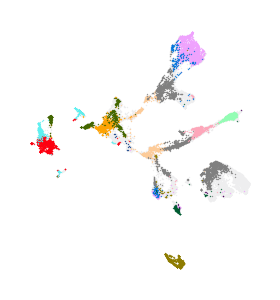

In [561]:
attr = np.array([inv_labels[i] for i in predicted])

less = np.sum(predicted_proba<0.6,axis=1)==predicted_proba.shape[1]
tmp = mplot.factors(attr,xy,cells=np.invert(less),figsize=(1.5,1.3),s=1,\
                cmap=color_lamanno_proto1,annotated=False,with_legend=False)

fname = ofolder+f'predicted_proba06.svg'

tmp.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)


tmp

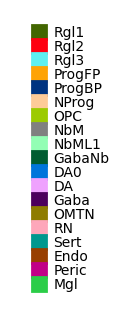

In [573]:
name = 'predicted_proba06'
ax_size = [0.91,0,0,0]
order = ['Rgl1','Rgl2','Rgl3','ProgFP','ProgBP','NProg','OPC','NbM',\
         'NbML1','GabaNb','DA0','DA','Gaba','OMTN','RN','Sert','Endo','Peric','Mgl']
ixs= own_utils.ixs_thatsort_a2b(list(color_lamanno_proto1.keys()),order)
scatterm_mod.draw_legend(np.array(list(color_lamanno_proto1.values()))[ixs],\
                         np.array(list(color_lamanno_proto1.keys()))[ixs],\
                         marker='s',fontsize=5,
                         ax_size=ax_size,ms=0.8,labelspacing=0)
fname = ofolder+f'{name}_legend.svg'
plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')

## TH

In [32]:
from cytograph.embedding import ArtOfTsne,UMAP

from cytograph.clustering import PolishedLeiden,MorePolishedLeiden,Aggregate

from cytograph.species import Species
from cytograph.species.human import ncRNA_human

In [31]:
ws_subset_ = db.builds.sten.humandev20220523.MidbrainTHneighbours_split_clean_sex_TH

xy_ = ws_subset_.Embedding[:]
sclusters = ws_subset_.Clusters[:]
scellid = ws_subset_.CellID[:]

In [552]:
tsne_dict = dict()
attr = np.array([str(i) for i in ws_subset_.Clusters[:]])
for i,v in enumerate(np.arange(1.5,4.2,0.2)):
    print(i,v)
    tsne_ = ArtOfTsne(exaggeration=v).fit(ws_subset_)
    tsne_dict[v] = tsne_
#     tmp = mplot.factors(attr,tsne_,figsize=(1.5,1.3),s=2,\
#                 annotated=False,with_legend=False)
#     plt.show()

INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


0 1.5


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


1 1.7


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


2 1.9


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


3 2.0999999999999996


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


4 2.3


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


5 2.5


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


6 2.6999999999999997


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


7 2.8999999999999995


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


8 3.0999999999999996


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


9 3.3


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


10 3.4999999999999996


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


11 3.6999999999999993


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


12 3.8999999999999995


INFO:root: ArtOfTsne: Using medium-scale heuristics (3,000 < n < 100,000)


13 4.1


In [579]:
ws_subset_.TSNE1_5 = shoji.Tensor("float32", ("cells",2), inits=np.array(tsne_dict[1.5]).astype("float32"))       

In [581]:
ws_subset_.TSNE1_5

<Tensor TSNE1_5 dtype='float32' dims=('cells', 2), shape=(4345, 2), chunks=(75, 2)>

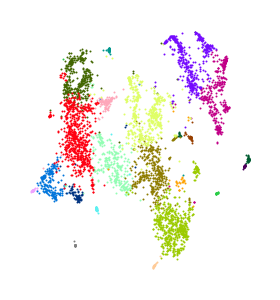

In [582]:
attr = np.array([str(i) for i in ws_subset_.Clusters[:]])
tmp,TH_clusters = mplot.factors(attr,ws_subset_.TSNE1_5[:],figsize=(1.5,1.3),s=2,\
                annotated=False,with_legend=False,return_col=True)
fname = ofolder+f'_TH/TSNE1_5_clusters.svg'

tmp.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)


tmp

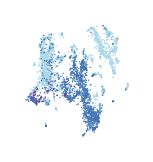

In [583]:
age_cmap = cgplot.Colorizer("age").cmap
age = ws_subset_.Age[:]
xy = ws_subset_.TSNE1_5[:]
cmap = scatterm_mod.scattern(figsize=(0.71,0.61),xy = xy, c=age,\
                             cmap=age_cmap, vmin=5, vmax=14, s=0.25,rasterized=True)

name = 'anno_age'
fname = ofolder+f'/_TH/TSNE1_5_{name}.svg'
plt.axis('off')
plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)


In [642]:
ws = db.builds.sten.humandev20220523.MidbrainTHneighbours_split_clean_sex
xy = ws.Embedding[:]
cellid = ws.CellID[:]

In [643]:
split_clu =dict(zip(scellid,sclusters))
attr =[]
for i in ws.CellID[:]:
    if i in split_clu.keys():
        attr.append(split_clu[i])
    else:
        attr.append('')
attr = np.array([str(i) for i in attr])

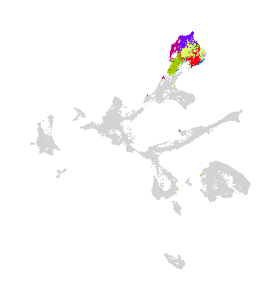

In [650]:
TH_clusters[''] = lightgrey
tmp = mplot.factors(attr = attr,embed = xy,figsize=(1.5,1.3),s=1, #(0.75,0.65),s=0.1,#
                 cmap= TH_clusters,\
                    annotated=False,with_legend=False)
name = 'TH_in_subset_small'
fname = ofolder+f'/_TH/{name}.svg'
tmp.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)
tmp

In [515]:
def clu_enrich_gene(ws_s):
    labels = ws_s.Clusters[:]
    b00l_var = ws_s.ValidGenes[:]

    import re
    search = re.compile('^RPL|^RPS|^MT-|^AC[0-9]{6}|^AP[0-9]{6}|^AL[0-9]{6}')
    ribo_mt = []
    for i in ws_s.Gene[:]:
        if search.search(i):
            ribo_mt.append(i)
    ribo_mt = np.isin(ws_s.Gene[:],ribo_mt)

    ncRNA = np.isin(ws_s.Accession[:],ncRNA_human)

    species = Species("Homo sapiens")
    tomask=["sex", "ery",'cellcycle','ieg','mt']    
    mask = species.mask(ws_s, tomask)

    mask = np.vstack([np.invert(b00l_var), mask, ribo_mt, ncRNA])
    mask = np.any(mask,axis=0)
    block = ws_s.Gene[mask]
    
    block = mask.nonzero()[0]
    Clusters = ws_s.Clusters[:]
    n_labels = Clusters.max() + 1
    n_markers = 5
    excluded = set(block)
    included = []
    for ix in range(n_labels):
        print(ix)
    #     ix_ = clu_dict[ix]
        enriched = np.argsort(ws_s.Enrichment[:][ix,:])[::-1]
        n = 0
        count = 0
        while count < n_markers:
            if enriched[n] in excluded:
                n += 1
                continue
    #         print(enriched[n])
            print(ws_s.Gene[:][enriched[n]])

            included.append(enriched[n])
            excluded.add(enriched[n])
            n += 1
            count += 1

    markers = np.array(included)

    return markers

In [516]:
markers = clu_enrich_gene(ws_subset_)

0
CMTM8
NXPH2
CHRM2
GRP
RBMS3-AS3
1
ONECUT1
HS6ST3
GABRG3-AS1
LRP1B
CALB1
2
LINC02300
SPRY1
KLHL14
SST
SLC30A3
3
TMEM255A
KCNH5
GPC6-AS1
SYNPR
CDH7
4
RSPO2
ZW10
PROSER2-AS1
IL1RAPL2
SNCA
5
LGALS14
VIP
S100A16
LINC02428
ITPRIP-AS1
6
PAX6
CRIP1
NEUROG1
VXN
BARHL1
7
SIM1
EMX2
EPHA6
PTPRK
DGKB
8
ARHGAP10
ADCY8
LUZP2
PRR16
KLRC2
9
ALDH1A1
RGS6
CDH8
KCNN3
CALN1
10
PAX5
PAX8
POU6F2
GABRB2
BCL11B
11
TFAP2B
IRX2
LINC01210
SOX21
GAD1
12
DMBX1
OTX2-AS1
SOX14
GATA3
MEIS2
13
MECOM
MIR924HG
CCND1
PAX3
GLI3
14
LHX9
CRABP1
TCF7L2
POU4F1
BARHL2
15
SLC44A4
SLC25A48
CXCL14
MTMR10
NUTM1
16
CLIC1
CAMKV
ZNF630-AS1
LINC02143
B3GNT8
17
LINC00616
SLC7A11-AS1
P2RX3
GALNT18
CBLN2
18
RGS4
MDGA2
CXCR4
MALRD1
SULF1
19
TAFA1
OPCML
NFIX
GSG1L
CRHBP
20
NEXN
LINC02488
STAR
NEUROD6
UPB1


In [657]:
def heatmap(ws_s,markers,ax,fig,clu_color):    
    
    width = int(fig.get_size_inches()[0])

    grid = (width, 100)
    ax = plt.subplot2grid(grid, (0, 3), rowspan=width,colspan=97)
    data = np.vstack([ws_s.MeanExpression[:, ix].T for ix in markers])
    data = np.log2(data + 1)
    x_norm = cg.div0(data, np.percentile(data.T, 99.9, axis=1)).T
    bg = np.zeros_like(data.T) + 0.9
    x_norm = np.ma.masked_where(data.T == 0, x_norm)


    n_clusters = data.shape[1]
    n_genes = data.shape[0]

    plt.imshow(bg, vmin=0, vmax=1, cmap=plt.cm.gray, aspect="auto", alpha=1,
               extent =(0,n_genes,n_clusters,0),interpolation="nearest", resample=False)
    plt.imshow(x_norm, cmap="inferno_r", vmax=1, interpolation="nearest", aspect="auto", alpha=1,
               extent =(0,n_genes,n_clusters,0),resample=False)

    plt.xticks(range(len(markers)), ws_s.Gene[:][markers], rotation='vertical', fontsize=5)
    plt.tick_params('x', length=2, width=0.5, which='major',pad=0.5)
    plt.margins(0, 0)
    plt.yticks([])
    for i in ['top','left','right','bottom']:
        ax.spines[i].set_linewidth(0.5)





    cbar = plt.colorbar(pad=0.01)
    cbar.ax.tick_params(labelsize=5,width=0.5)
    cbar.outline.set_linewidth(0.5)

    ax = plt.subplot2grid(grid, (0, 1), rowspan=width,colspan=1)
    d = np.array([clu_color[str(v_i)] for v_i in range(n_clusters)]) 
    plt.imshow(np.expand_dims(d, axis=1), aspect='auto', interpolation='nearest', cmap=cmap_,rasterized=True)
    plt.axis("off")


# fname = ofolder+f'_TH/enrich_morepolished.svg'
# plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)


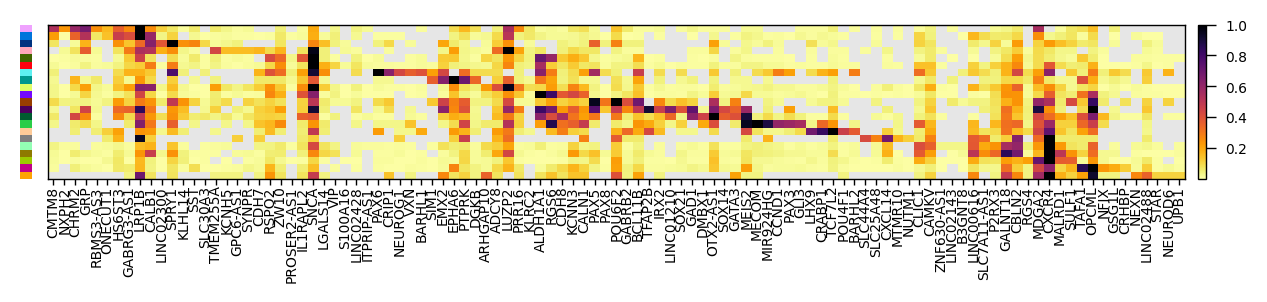

In [589]:
width = 9
fig, axes = plt.subplots(
                 figsize=((width, 1)))
heatmap(ws_subset_,markers,axes,fig,TH_clusters)

fname = ofolder+f'_TH/enrich.svg'
plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent =transparency)

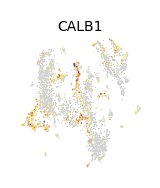

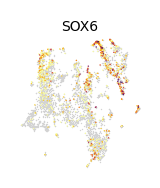

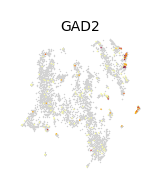

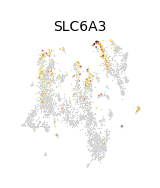

In [34]:
genes_list = ['TH','CALB1','SOX6','GAD2','ALDH1A1','DDC','SLC6A3']
xy = ws_subset_.TSNE1_5[:]

for g in genes_list:
    genes = g
    c=np.log2(ws_subset_.Expression[:, ws_subset_.Gene == g].flatten() + 1)
    sm = scatterm_mod.scattern(
        figsize= (0.75,0.65),
        xy = xy,
        c=c,
        bgval=0,
        rasterized=True,
        s=0.25
    )
    plt.title(genes,fontsize=5,y=0.93)
    plt.margins(0.01, 0.01)
    plt.axis('off')

#     name = '_'.join([genes])
#     fname = ofolder+f'_TH/{name}.svg'
#     plt.savefig(fname, format="svg", dpi=400, bbox_inches='tight',transparent =transparency)
    